# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Business Analytics</font>

# <font color='blue'>Capítulo 13 - Supply Chain Analytics</font>
## <font color='blue'>Mini-Projeto 7</font>
### <font color='blue'>Previsão de Demanda de Pedidos com Multioutput Regression Analysis</font>

![title](imagens/mini-projeto7.png)

## Definição do Problema

Leia o manual em pdf no Capítulo 13 do curso.

## Fonte de Dados

Leia o manual em pdf no Capítulo 13 do curso.

## Compreendendo o Que é Multioutput Regression Analysis

![title](imagens/reg.png)

![title](imagens/table.png)

## Instalando e Carregando os Pacotes

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.8.11


In [2]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# !pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark

In [3]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn import preprocessing
%matplotlib inline

In [4]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

matplotlib: 3.4.2
numpy     : 1.20.3
sklearn   : 0.24.2
pandas    : 1.3.2



## Tarefa 1 - Single Output Regression Analysis

### Carregando os Dados

In [5]:
# Carrega os dados
dados = pd.read_csv(r"dados/dataset.csv")

In [6]:
# Shape
dados.shape

(18, 6)

In [7]:
# Colunas
dados.columns

Index(['Ano', 'Periodo', 'Total_Vendas',
       'Percentual_Aumento_Vendas_Ano_Anterior', 'Total_Unidades_Vendidas',
       'Percentual_Aumento_Unidades_Ano_Anterior'],
      dtype='object')

In [8]:
# Amostra de dados
dados.head()

,Ano,Periodo,Total_Vendas,Percentual_Aumento_Vendas_Ano_Anterior,Total_Unidades_Vendidas,Percentual_Aumento_Unidades_Ano_Anterior
0,2002,2002-03,19666.640,6.610000,3097,7.570000
1,2003,2003-04,20384.980,3.652581,3289,6.199548
2,2004,2004-05,20810.281,2.086345,3490,6.111280
3,2005,2005-06,21184.427,1.797890,3626,3.896848
4,2006,2006-07,21977.311,3.742768,3736,3.033646


### Pré-Processamento dos Dados

In [9]:
# Extraindo a variável ano (variável de entrada)
array_ano = dados["Ano"].values.reshape(-1,1)

In [10]:
array_ano

array([[2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012],
       [2013],
       [2014],
       [2015],
       [2016],
       [2017],
       [2018],
       [2019]])

In [11]:
type(array_ano)

numpy.ndarray

In [12]:
# Valores máximo e mínimo
max_f = max(array_ano)
min_f = min(array_ano)
print(max_f)
print(min_f)

[2019]
[2002]


In [13]:
# Pré-processamento (normalização)
norm_features = preprocessing.minmax_scale(array_ano)
print(array_ano)

[[2002]
 [2003]
 [2004]
 [2005]
 [2006]
 [2007]
 [2008]
 [2009]
 [2010]
 [2011]
 [2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]
 [2018]
 [2019]]


In [14]:
# Variável de saída
label = dados["Total_Vendas"]

In [15]:
# Visualiza
label

0     19666.640
1     20384.980
2     20810.281
3     21184.427
4     21977.311
5     22580.893
6     22313.054
7     24124.309
8     25667.919
9     26617.490
10    27234.865
11    28029.747
12    28963.782
13    29415.865
14    30790.906
15    32009.092
16    33370.630
17    34700.115
Name: Total_Vendas, dtype: float64

In [16]:
# Valores máximo e mínimo
max_l = max(label)
min_l = min(label)
print(max_l)
print(min_l)

34700.115
19666.64


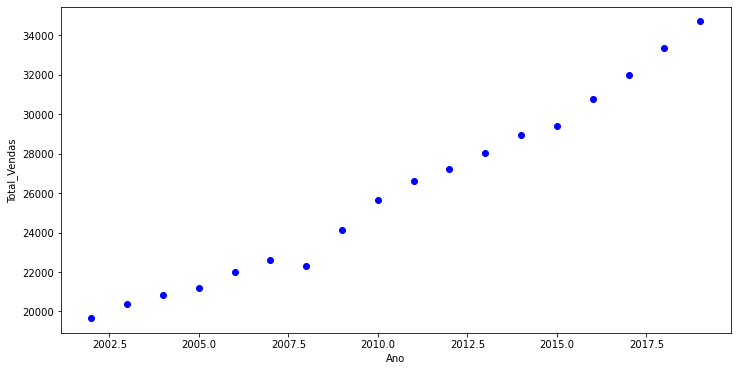

In [17]:
# Plot
plt.figure(figsize = (12, 6))
plt.scatter(dados['Ano'], dados['Total_Vendas'], c = 'blue')
plt.ylabel("Total_Vendas")
plt.xlabel("Ano")
plt.show()

In [18]:
# Normaliza o label
norm_label = preprocessing.minmax_scale(label)
print(norm_label)

[0.         0.0477827  0.07607296 0.10096049 0.15370172 0.19385092
 0.17603475 0.29651621 0.3991944  0.46235817 0.50342486 0.55629899
 0.61842934 0.6485011  0.73996638 0.82099794 0.91156502 1.        ]


In [19]:
# Divide os dados em treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(norm_features, 
                                                        norm_label, 
                                                        test_size = 0.075,
                                                        random_state = 3)

### Modelo Single Output Regression

In [20]:
# Cria o modelo de regressão linear com single output
modelo_single_output = linear_model.LinearRegression()

In [21]:
# Treinamento
modelo_single_output.fit(x_treino, y_treino)

LinearRegression()

In [22]:
# Lista de anos para as previsões
anos = [2020,2021,2022,2023,2024,2025]

2020
[0.98805448]
[34520.53236724]
2021
[1.04707872]
[35407.87182586]
2022
[1.10610297]
[36295.21128448]
2023
[1.16512721]
[37182.5507431]
2024
[1.22415145]
[38069.89020172]
2025
[1.28317569]
[38957.22966034]


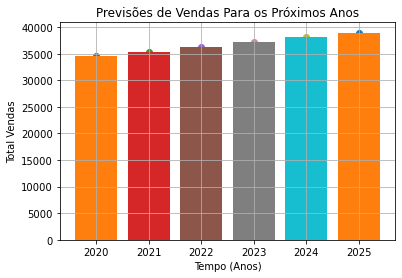

In [23]:
# Loop com as previsões
for i in anos:
    
    x = i
    print(x)
    
    # Normaliza os dados
    scaled_x = float((x - min_f) / (max_f - min_f))
    
    # Extrai o coeficiente do valor previsto
    coef = modelo_single_output.predict([[scaled_x]])
    print(coef)
    
    # Calcula a previsão desfazendo a normalização
    pred = coef * (max_l - min_l) + min_l
    y = pred
    print(y)
    
    # Plot
    plt.scatter(x, y)
    plt.bar(x, pred)
    plt.ylabel('Total Vendas')
    plt.xlabel('Tempo (Anos)')
    plt.grid(True)
    plt.title('Previsões de Vendas Para os Próximos Anos')
    

In [24]:
# Extrai as previsões do modelo
y_pred = modelo_single_output.predict(x_teste)

In [25]:
# Calcula a performance do modelo
df = pd.DataFrame({'Total Vendas Real':y_teste, 'Total Vendas Previsão':y_pred})
print("Valor Real x Valor Previsto:\n\n", df)

Valor Real x Valor Previsto:

    Total Vendas Real  Total Vendas Previsão
0           0.556299               0.574885
1           0.076073               0.043667


In [26]:
# Score
score = modelo_single_output.score(x_teste, y_teste)

In [27]:
print("Precisão do Modelo:",(score * 100))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_teste, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_teste, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_teste, y_pred)))

Precisão do Modelo: 98.78967908950257
Mean Absolute Error: 0.025496072185115272
Mean Squared Error: 0.0006978015610769276
Root Mean Squared Error: 0.026415933848284213


## Tarefa 2 - Multiple Output Regression Analysis

https://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputRegressor.html

In [28]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn import metrics 
from sklearn.metrics import accuracy_score
%matplotlib inline

In [29]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

matplotlib: 3.4.2
numpy     : 1.20.3
sklearn   : 0.24.2
pandas    : 1.3.2



### Carregando os Dados

In [30]:
# Carrega os dados
dados = pd.read_csv(r"dados/dataset.csv")

In [31]:
# Visualiza os dados
dados.head()

,Ano,Periodo,Total_Vendas,Percentual_Aumento_Vendas_Ano_Anterior,Total_Unidades_Vendidas,Percentual_Aumento_Unidades_Ano_Anterior
0,2002,2002-03,19666.640,6.610000,3097,7.570000
1,2003,2003-04,20384.980,3.652581,3289,6.199548
2,2004,2004-05,20810.281,2.086345,3490,6.111280
3,2005,2005-06,21184.427,1.797890,3626,3.896848
4,2006,2006-07,21977.311,3.742768,3736,3.033646


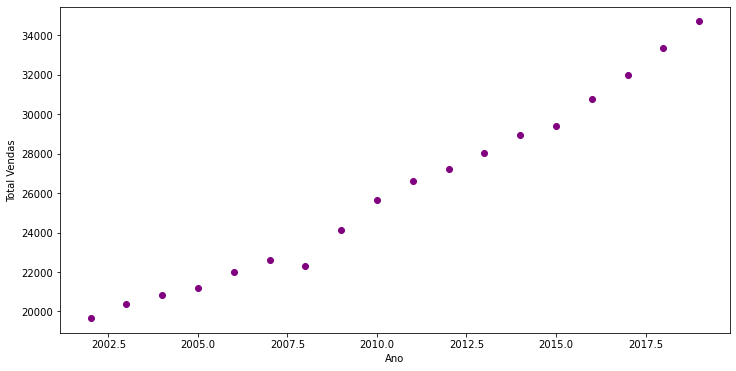

In [32]:
# Plot
plt.figure(figsize = (12, 6))
plt.scatter(dados['Ano'], dados['Total_Vendas'], c = 'purple')
plt.ylabel("Total Vendas")
plt.xlabel("Ano")
plt.show()

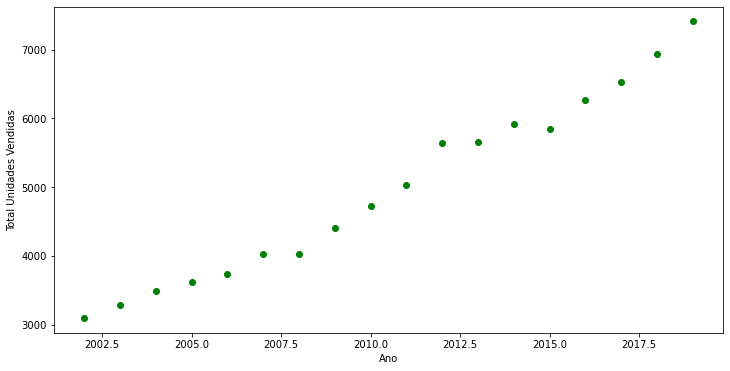

In [33]:
# Plot
plt.figure(figsize = (12, 6))
plt.scatter(dados['Ano'], dados['Total_Unidades_Vendidas'], c = 'green')
plt.ylabel("Total Unidades Vendidas")
plt.xlabel("Ano")
plt.show()

In [34]:
# Extrai a variável preditora
X = dados["Ano"].values.reshape(-1,1)

In [35]:
# Extrai duas variáveis alvo
Y = dados.iloc[:, [2,4]]

In [36]:
print(Y)

    Total_Vendas  Total_Unidades_Vendidas
0      19666.640                     3097
1      20384.980                     3289
2      20810.281                     3490
3      21184.427                     3626
4      21977.311                     3736
5      22580.893                     4030
6      22313.054                     4034
7      24124.309                     4408
8      25667.919                     4720
9      26617.490                     5028
10     27234.865                     5642
11     28029.747                     5653
12     28963.782                     5925
13     29415.865                     5846
14     30790.906                     6261
15     32009.092                     6526
16     33370.630                     6934
17     34700.115                     7409


In [37]:
# Diviasão em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, Y, test_size = 0.10, random_state = 4)

### Modelo MultiOutput Regressor

In [38]:
# Hiperparâmetros
max_depth = 30
num_estimadores = 100

In [39]:
# Cria o modelo
modelo_multioutput = MultiOutputRegressor(RandomForestRegressor(n_estimators = num_estimadores,
                                                                max_depth = max_depth,
                                                                random_state = 42))

In [40]:
# Treinamento
modelo_multioutput.fit(X_treino, y_treino)

MultiOutputRegressor(estimator=RandomForestRegressor(max_depth=30,
                                                     random_state=42))

In [41]:
# Previsão do modelo
y_pred = modelo_multioutput.predict(X_teste)

In [42]:
y_pred

array([[23045.39749,  4130.04   ],
       [21132.40174,  3550.66   ]])

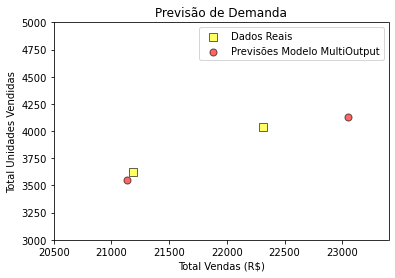

In [43]:
# Plot

# Cria a figura
plt.figure()

# Plot dos dados reais
plt.scatter(y_teste.iloc[:, 0].values, 
            y_teste.iloc[:, 1].values, 
            edgecolor = 'k', 
            c = "yellow", 
            s = 50, 
            marker = "s", 
            alpha = 0.6, 
            label = "Dados Reais")

# Plot das previsões
plt.scatter(y_pred[:, 0], 
            y_pred[:, 1], 
            edgecolor = 'k',
            c = "red", 
            s = 50, 
            alpha = 0.6,
            label = "Previsões Modelo MultiOutput")

# Limites para o gráfico
plt.xlim([20500, 23400])
plt.ylim([3000, 5000])

# Labels do gráfico
plt.xlabel("Total Vendas (R$)")
plt.ylabel("Total Unidades Vendidas")
plt.title("Previsão de Demanda")
plt.legend()
plt.show()

In [44]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_teste, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_teste, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_teste, y_pred)))

Mean Absolute Error: 238.9371875000004
Mean Squared Error: 138483.35305585555
Root Mean Squared Error: 372.13351509351526


In [45]:
print("\nX_Teste\n", X_teste)
print("\nY_teste\n", y_teste)
print("\nY_pred\n", y_pred)


X_Teste
 [[2008]
 [2005]]

Y_teste
    Total_Vendas  Total_Unidades_Vendidas
6     22313.054                     4034
3     21184.427                     3626

Y_pred
 [[23045.39749  4130.04   ]
 [21132.40174  3550.66   ]]


# Fim